# В чому проблема SimpleRNN?

1. Затухання та вибухання градієнту
2. Коротка "пам'ять"
3. Довге навчання

![alt text](https://i.pinimg.com/originals/f2/03/83/f2038357b32e6ad4cd8b74381255bedd.png)

In [1]:
print(0.99**365)
print(1.00**365)
print(1.01**365)

0.025517964452291125
1.0
37.78343433288728


## Проблема зникаючого градієнта в РНМ

https://plainenglish.io/community/vanishing-gradient-problem-in-rnns-9d8e14#recurrent-structure

RNN мають рекурентну (циклічну) структуру, яка дозволяє їм обробляти послідовності даних один крок за раз. На кожному кроці вони оновлюють свій внутрішній стан і роблять прогнози на основі цього стану.

Під час навчання RNN використовують градієнтний спуск, щоб налаштувати свої параметри (ваги та зміщення), щоб мінімізувати помилку передбачення. Це включає в себе обчислення градієнтів, які вказують, наскільки кожен параметр повинен бути скоригований, щоб зменшити помилку.



![alt text](https://miro.medium.com/v2/resize:fit:875/1*f-D1eoDirGtLzOXEPQ3r0g.png)

Для обчислення цих градієнтів RNN використовують техніку, яка називається зворотним поширенням у часі (BPTT). BPTT — це варіант стандартного алгоритму зворотного поширення, призначений для послідовних даних. Він передбачає розгортання RNN через часові кроки та обчислення градієнтів крок за кроком, від кінця послідовності назад до початку.

Ось де виникає проблема. Оскільки BPTT розраховує градієнти назад у часі, він включає в себе похідні втрат щодо параметрів моделі на кожному часовому кроці. Ці похідні множаться разом, коли вони поширюються назад.

Оскільки градієнти перемножуються разом, якщо градієнти на кожному часовому кроці менші за 1 (наприклад, через використання функцій активації, таких як sigmoid або tanh, які зміщують значення між 0 і 1), це множення призводить до ефекту зведення. У міру того, як ви повертаєтеся далі в часі, градієнти стають дедалі меншими.



![alt text](https://miro.medium.com/v2/resize:fit:875/1*XGWnnsUS310HN4TUFDnfRw.png)

**Вплив градієнтів, що зникають**

1. Повільна конвергенція

Навчання нейронних мереж зі зникаючими градієнтами, як правило, відбувається повільно. Оскільки градієнти дуже малі, оновлення параметрів незначні, і потрібно багато ітерацій (епох), щоб модель наблизилася до прийнятного рішення. Цей розширений час навчання може бути дорогим з обчислювальної точки зору.

2. Труднощі з вивченням довгострокових залежностей

Основний вплив полягає в тому, що моделям, на які впливають зникаючі градієнти, важко вловити та вивчити довгострокові залежності в послідовних даних. У таких програмах, як обробка природної мови, розпізнавання мовлення або прогнозування часових рядів, розуміння контексту або шаблонів у довгій послідовності даних має вирішальне значення. Проблема зникнення градієнта ускладнює для моделі збереження інформації з кроків далекого минулого, що призводить до нижчої продуктивності завдань, які потребують такої пам’яті.

3. Застряг у місцевих мінімумах

Невеликі градієнти іноді можуть призвести до того, що процес оптимізації застряє в локальних мінімумах. Це означає, що модель може не досягти найкращого можливого рішення, оскільки їй важко вийти з областей функції втрат, де градієнт майже дорівнює нулю.

4. Нестабільність моделі

Зникнення градієнтів може призвести до нестабільності моделі. Незначні збурення у вхідних даних або параметрах моделі можуть призвести до суттєво відмінних прогнозів, роблячи модель менш стійкою та надійною.

5. Надмірний акцент на останніх даних

Моделі, на які впливає проблема зникнення градієнта, як правило, надають більшої ваги останнім даним і нехтують інформацією з минулого. Це упередження щодо останніх даних може призвести до неоптимальних прогнозів і відсутності історичного контексту в результатах моделі.

6. Труднощі в навчанні глибоких мереж

Проблема зникнення градієнта більш виражена в глибоких нейронних мережах з багатьма шарами. Навчання глибоких мереж стає дедалі складнішим, особливо коли використовуються стандартні функції активації, такі як sigmoid або tanh, оскільки вони збивають значення між 0 і 1, роблячи градієнти ще меншими.


![alt text](https://miro.medium.com/v2/resize:fit:1400/1*Pd-jyEsefH0ILRbY-_zWJw.png)

**Методи зменшення градієнта, що зникає**

1. Ініціалізація ваги

Ініціалізуйте ваги RNN ретельно підібраними значеннями, як ініціалізація Xavier/Glorot, щоб гарантувати, що градієнти спочатку не будуть надто малими.

2. Градієнтне відсікання (Gradient Clipping)

Обмежте розмір градієнтів під час навчання. Якщо градієнт перевищує певне порогове значення, зменшіть його масштаб, щоб запобігти тому, щоб він став занадто малим або вибухнув.

3. Використання функцій активації

Використовуйте функції активації, які менш схильні до зникнення градієнтів, наприклад ReLU (Rectified Linear Unit) або такі варіанти, як Leaky ReLU та Parametric ReLU (PReLU).

4. Пропустити підключення (Skip Connections)

Реалізуйте з'єднання пропуску або залишкові з'єднання між шарами RNN. Це допомагає градієнтам легше проходити через мережу.

5. Довга короткочасна пам'ять (LSTM)

Замініть стандартні комірки RNN на комірки LSTM, які розроблені для кращого охоплення довгострокових залежностей і пом’якшення проблеми зникнення градієнта.

6. Закритий рекурентний блок (GRU)

Подібно до LSTM, GRU є ще одним типом осередку RNN, який вирішує проблему зникнення градієнта за допомогою механізмів стробування для керування потоком інформації.

7. Механізми уваги

Інтегруйте механізми уваги в свою архітектуру RNN. Механізми звернення уваги дозволяють мережі зосереджуватися на відповідних частинах вхідної послідовності, зменшуючи залежність від довготривалих залежностей.

https://medium.com/hackernoon/understanding-architecture-of-lstm-cell-from-scratch-with-code-8da40f0b71f4

# Long Short-Term Memory (LSTM)

![alt text](https://miro.medium.com/v2/resize:fit:1400/1*7cMfenu76BZCzdKWCfBABA.png)


**LSTM, або Long Short-Term Memory**, є типом рекурентних нейронних мереж, який був спроектований для вирішення проблеми зникнення та вибуху градієнтів у традиційних рекурентних нейронних мережах (RNNs).

Особливістю LSTM є здатність зберігати та використовувати інформацію на тривалий термін, уникати проблеми "зникнення градієнту" та дозволяти моделі зосередитися на важливих сигналах у вхідних даних.

Термін "Long Short-Term Memory" (LSTM) з'явився в літературі в роботі Хохрейтера і Шмідхубера (Hochreiter & Schmidhuber) **у 1997 році**.

Вони представили LSTM як вдосконалення традиційних рекурентних нейронних мереж (RNNs), яке дозволяє моделі зберігати та використовувати інформацію на тривалий термін, уникаючи проблеми "зникнення градієнту".

https://en.wikipedia.org/wiki/Long_short-term_memory
https://en.wikipedia.org/wiki/Sepp_Hochreiter
https://en.wikipedia.org/wiki/J%C3%BCrgen_Schmidhuber

![alt text](https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2021-03-16-13-41-03.png)

Основною ідеєю за LSTM є введення спеціальних комірок пам'яті, які можуть зберігати, забувати та читати інформацію. Ці комірки мають три основні компоненти:

- **Функція забування (Forget Gate):**

 Вона визначає, яку інформацію в поточній станції пам'яті слід забути або ігнорувати. Вона відбирає, яка частина інформації в комірці пам'яті буде оновлена.

- **Функція входу (Input Gate):**

 Ця функція визначає, яка нова інформація буде додана до стану пам'яті. Вона визначає, які значення ми оновлюємо в пам'яті.

- **Функція виходу (Output Gate):**

 Вона визначає, який вихід мережі буде заснований на пам'яті. Вона допомагає визначити, яка частина пам'яті буде використовуватися для прогнозування.

![alt text](https://miro.medium.com/v2/resize:fit:1039/1*QiLYco0hB8EterWYTyyv4g.png)

## Алгоритм роботи



1. **Вхід LSTM (Input).**

Припустимо, що в кожен момент часу $t$ LSTM отримує вхідний вектор $x_t$.Означимо вектор входу на момент часу $t$ як $x_t$

2. **Внутрішній стан (Cell State).**

Внутрішній стан LSTM на момент часу t позначається $c_t$.Він відображає стан пам'яті LSTM і може зберігати інформацію на тривалий термін.
3. **Вихідний стан LSTM (Output).**

Вихідний стан LSTM на момент часу t позначається $ℎ_t$.Він є вихідним сигналом LSTM для поточного часового кроку.

4. **Функція забування (Forget Gate).**

Forget gate визначає, яка частина інформації з попереднього внутрішнього стану $c_{t-1}$ повинна бути забута.Вихід forget gate на момент часу t позначається $f_t$. Формула forget gate:

$$f_t = σ(W_f ⋅ [h_{t-1}, x_t] + b_f)$$
$f_t$ - вихід Forget Gate на момент часу

$σ$ - сигмоїдна функція активації

$W_f$ - вагова матриця

$h_{t-1}$ - вихід LSTM на попередньому часовому кроці

$x_t$ - вхід LSTM на поточному часовому кроці

$b_f$ -  зміщення (bias)
5. **Функція входу (Input Gate).**

Input gate визначає, яка нова інформація повинна бути збережена во внутрішньому стані $c_t$. Вихід input gate на момент часу t позначається $i_t$.
Формула input gate:
$$i_t = σ(W_i ⋅ [h_{t-1}, x_t] + b_i)$$
6. **Оновлення внутрішнього стану (Cell State Update).**
Після визначення forget gate, input gate та отримання нового вхідного вектора, оновлення внутрішнього стану відбувається згідно наступної формули:

$$\tilde{c}_t = \tanh(W_c \cdot [h_{t-1}, x_t] + b_c)$$
$$c_t = f_t\cdot c_{t-1} + i_{t-1}\cdot \tilde{c}_t$$

7. **Вихідний gate (Output Gate).**

Output gate визначає, яка частина внутрішнього стану $c_t$ буде використана для вихідного сигналу $h_t$. Вихід output gate на момент часу t позначається $o_t$.
Формула output gate:
$$o_t = σ(W_o ⋅ [h_{t-1}, x_t] + b_o)$$

6. **Тренування.**

LSTM, як і інші нейронні мережі, піддаються тренуванню шляхом оптимізації вагових коефіцієнтів за допомогою методів зворотного поширення помилки.

![alt text](https://miro.medium.com/v2/resize:fit:1032/0*O_TqfQ4537oM4MH0.gif)

## Підсумок

LSTM вирішує проблему зникаючого градієнту, зберігаючи стару інформацію в стані клітини, що дозволяє використовувати її пізніше. Ворота забування вирішують, яку інформацію варто відкинути зі стану клітини, ворота оновлення вирішують, яку нову інформацію додати, а вихідні ворота вирішують, що виводити на основі стану клітини. Ці механізми управління допомагають LSTM вловлювати довгострокові залежності в послідовних даних.

## Практика

https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

In [2]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [3]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [4]:
model = Sequential()
model.add(Embedding(max_features, 32)) # Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
                                       # Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
history = model.fit(input_train,
                    y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 37s 244ms/step - loss: 0.6318 - acc: 0.6317 - val_loss: 0.4650 - val_acc: 0.8040
Epoch 2/5
137/137 [==============================] - 27s 196ms/step - loss: 0.3884 - acc: 0.8386 - val_loss: 0.3298 - val_acc: 0.8675
Epoch 3/5
137/137 [==============================] - 28s 201ms/step - loss: 0.2858 - acc: 0.8874 - val_loss: 0.3235 - val_acc: 0.8703
Epoch 4/5
137/137 [==============================] - 27s 200ms/step - loss: 0.2434 - acc: 0.9083 - val_loss: 0.2968 - val_acc: 0.8735
Epoch 5/5
137/137 [==============================] - 27s 195ms/step - loss: 0.2064 - acc: 0.9253 - val_loss: 0.3039 - val_acc: 0.8700


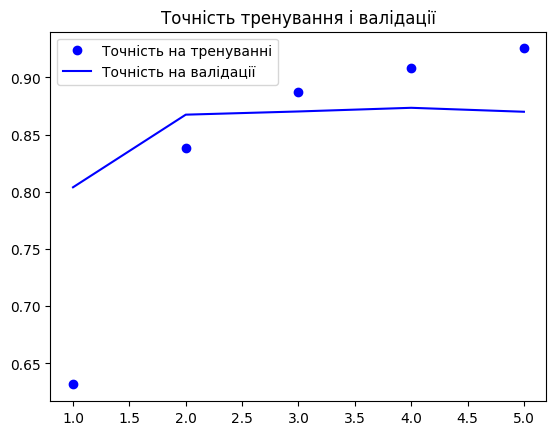

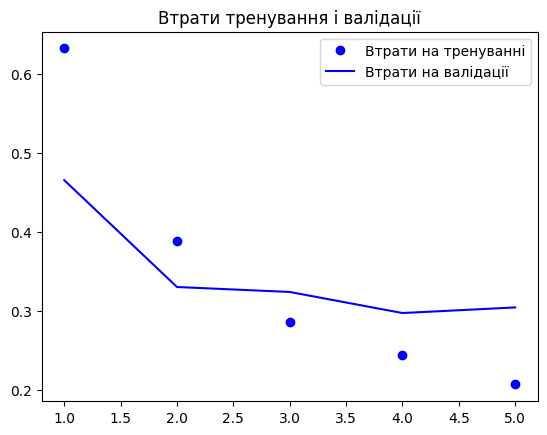

In [6]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [7]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 20s 25ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 20s 25ms/step - loss: 0.3177 - acc: 0.8634
Test Loss: 0.31774282455444336
Test Accuracy: 0.8633599877357483


# Gated Recurrent Unit (GRU)

![alt text](https://miro.medium.com/v2/resize:fit:1194/1*B0q2ZLsUUw31eEImeVf3PQ.png)

GRU (Gated Recurrent Unit) - це інша архітектура рекурентної нейронної мережі (RNN), яка призначена для обробки послідовних даних. Вона є альтернативою LSTM і також дозволяє моделі зберігати та використовувати інформацію на тривалий термін, уникаючи проблеми "зникнення градієнту".

Основні відмінності GRU від LSTM полягають у спрощеній структурі та меншій кількості параметрів. У GRU відсутні окремі комірки пам'яті, як у LSTM, замість цього вона використовує два типи воріт: ворота оновлення (Update Gate) і ворота перезавантаження (Reset Gate).

Архітектура GRU (Gated Recurrent Unit) була запропонована Кьун Чунгом та його колегами у 2014 році у статті "Empirical Evaluation of Gated Recurrent Neural Networks on Sequence Modeling". Вони використали GRU для різних завдань з обробки послідовних даних і показали, що ця архітектура може конкурувати з LSTM за ефективністю, при цьому вона має меншу складність та кількість параметрів. Відтоді GRU став широко використовуваним варіантом для моделювання послідовних даних у глибокому навчанні.


https://en.wikipedia.org/wiki/Gated_recurrent_unit

https://scholar.google.ca/citations?user=2HE7cTEAAAAJ&hl=en




![alt text](https://miro.medium.com/v2/resize:fit:1200/1*LfH52lSd1mq-UrWuejzO8g.png)

Основні компоненти GRU включають:

1. **Ворота оновлення (Update Gate)**

Відповідає за визначення того, якою мірою внутрішній стан має оновлюватися на кожному кроці часу.Контролює, яка частина попереднього внутрішнього стану слід передавати наступному кроку.

2. **Ворота перезавантаження (Reset Gate)**

Відповідає за вирішення того, якою мірою інформація з вхідного сигналу та попереднього стану має бути ігнорована.

3. **Оновлений внутрішній стан:**

Застосовується формула, що використовує ворота оновлення для оновлення внутрішнього стану.

4. **Вихід GRU:**

Відповідає за вироблення вихідного сигналу на кожному кроці часу.

## Алгоритм роботи GRU

1. **Вхід ГРУ (Input):**

На кожному кроці часу $t$, GRU отримує вхідний вектор $x_t$.

2. **Внутрішній стан (Hidden State):**

Внутрішній стан ГРУ на кроці часу $t$ позначається $h_t$.Він представляє собою інформацію, яка передається від попередніх кроків часу.

3. **Ворота оновлення (Update Gate):**

Ворота оновлення регулює, яка частина попереднього внутрішнього стану $h_{t-1}$ буде оновлена. Виражається формулою:
$$z_t = σ(W_z ⋅ [h_{t-1}, x_t] + b_z)$$

4. **Ворота перезавантаження (Reset Gate):**

Ворота перезавантаження визначають, яка частина попереднього внутрішнього стану $h_{t-1}$  буде ігноруватися.Виражається формулою:
$$r_t = σ(W_r ⋅ [h_{t-1}, x_t] + b_r)$$

5. **Оновлення внутрішнього стану:**

Використовуючи ворота оновлення та ворота перезавантаження, внутрішній стан оновлюється:
$$\tilde{h}_t = \tanh(W \cdot [r_t ⊙ h_{t-1}, x_t] + b)$$
$$h_t = (1-z_t)⊙ h_{t-1} + z_{t} ⊙ \tilde{h}_t$$

$⊙$ - це покомпонентне множення

$\tilde{h}_t$ - тимчасовий вектор оновленого стану

6. **Вихід ГРУ:**

Вихід ГРУ на кроці часу $t$ виражається просто як $h_t$ .

![alt text](https://miro.medium.com/v2/resize:fit:1192/1*njZq0whNShGO-ejGb0JQpQ.gif)

## Підсумок


Основна перевага GRU полягає у тому, що вона має менше параметрів, оскільки не використовує окремі комірки пам'яті. Це може робити її привабливішою для завдань, де обмежені ресурси, або для моделей, яким потрібно менше часу на тренування. GRU також може бути корисним в ситуаціях, де немає потреби в складних моделях з багатьма параметрами, і вона може продемонструвати аналогічну чи навіть кращу ефективність порівняно з LSTM.

## Практика

https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU

In [8]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense

In [9]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [10]:
model = Sequential()
model.add(Embedding(max_features, 32)) # Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
                                       # Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326369 (1.24 MB)
Trainable params: 326369 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
history = model.fit(input_train,
                    y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 28s 189ms/step - loss: 0.6567 - acc: 0.5995 - val_loss: 0.4688 - val_acc: 0.7797
Epoch 2/5
137/137 [==============================] - 25s 179ms/step - loss: 0.3891 - acc: 0.8297 - val_loss: 0.3632 - val_acc: 0.8437
Epoch 3/5
137/137 [==============================] - 25s 181ms/step - loss: 0.2934 - acc: 0.8798 - val_loss: 0.3453 - val_acc: 0.8604
Epoch 4/5
137/137 [==============================] - 25s 183ms/step - loss: 0.2438 - acc: 0.9051 - val_loss: 0.3428 - val_acc: 0.8599
Epoch 5/5
137/137 [==============================] - 25s 179ms/step - loss: 0.2134 - acc: 0.9191 - val_loss: 0.3206 - val_acc: 0.8736


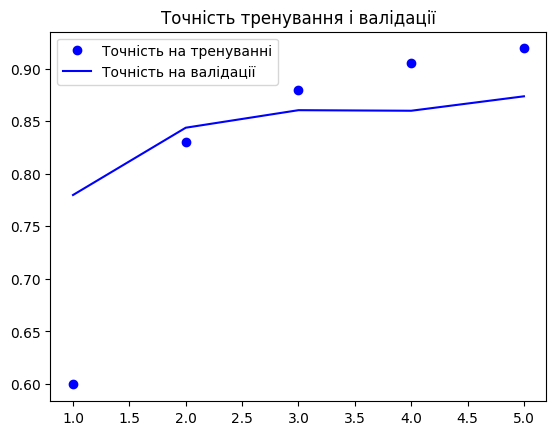

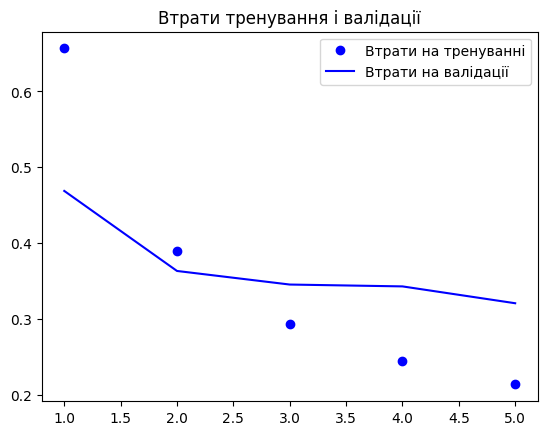

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [13]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 18s 23ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 18s 23ms/step - loss: 0.3338 - acc: 0.8688
Test Loss: 0.3337754011154175
Test Accuracy: 0.8687599897384644


# Bidirectional Recurrent Neural Network (BRNN)

![alt text](https://i.ytimg.com/vi/GWHvat80nEM/maxresdefault.jpg)

**BRNN (Bidirectional Recurrent Neural Network)** - це архітектура рекурентної нейронної мережі, яка дозволяє моделювати послідовні дані в обох напрямках, враховуючи інформацію як з минулого, так і з майбутнього.

Основна ідея BRNN полягає в тому, щоб мати дві незалежні частини мережі, які працюють в протилежних напрямках. Одна частина обробляє послідовність даних з початку до кінця (зліва направо), тоді як інша частина обробляє послідовність даних з кінця до початку (справа наліво). Результати обох частин потім комбінуються, зазвичай шляхом конкатенації, для отримання остаточного вихідного сигналу.

Архітектура BRNN (Bidirectional Recurrent Neural Network) була запропонована Шерманом та Пломером (Schuster & Paliwal) у 1997 році в статті "Bidirectional recurrent neural networks". В їхній роботі вони розглядали проблеми контекстної залежності в рекурентних нейронних мережах і запропонували BRNN як спосіб моделювання інформації в обох напрямках послідовності. Відтоді BRNN стали важливим інструментом у глибокому навчанні для роботи з послідовними даними.

https://www.researchgate.net/publication/3316656_Bidirectional_recurrent_neural_networks


![alt text](https://miro.medium.com/v2/resize:fit:680/1*sf4vCzcyycSe7GC3dZ2u2w.png)

Особливість.

1. Перша частина BRNN обробляє послідовність даних в прямому напрямку, від початку до кінця (зліва направо)
2. Друга частина BRNN обробляє ту саму послідовність даних у зворотному напрямку, від кінця до початку (справа наліво).
3. Виходи з обох напрямків об'єднуються, зазвичай шляхом конкатенації, для отримання остаточного вихідного сигналу.

## Алгоритм дії

1. **Прямий прохід (Forward Pass):**

$$h_{t}^{(f)} = f(W\cdot x_{t} + U\cdot h_{t-1}^{(f)} + b)$$

$x_t$ - вхід на часовому кроці t

$h_t^f$ - $прямий прихований стан на часовому кроці t

$h_{t-1}^f$ - прямий прихований стан на часовому кроці t-1

W, U - матриці ваг

b - вектор зміщення

f - функція активації

2. **Зворотний прохід (Backward Pass):**

$$h_{t}^{(b)} = f(W\cdot x_{t} + U\cdot h_{t-1}^{(b)} + b)$$

$h_t^b$ - зворотний прихований стан на часовому кроці t

$h_{t-1}^b$ - зворотний прихований стан на часовому кроці t+1
3. **Об'єднання виходів:**

$$y_{t} = g(V \cdot [h_{t}^{(f)} ; h_{t}^{(b)}] + c)$$

![alt text](https://files.codingninjas.in/article_images/bidirectional-lstm-2-1644656900.webp)

## Висновки

BRNN корисний у випадках, коли для кращого розуміння послідовних даних важлива інформація із контексту як з минулого, так і з майбутнього. Він може бути застосований у багатьох областях, таких як обробка природної мови, розпізнавання мови, машинний переклад, аналіз тексту та інші задачі, де важливий контекст у всіх напрямках послідовності.

Одним з недоліків BRNN є те, що вам потрібна повна послідовність даних перед тим, як робити прогнози будь-де, що означає, що вони не підходять для прогнозування в реальному часі.

Крім того, BRNN можуть додати додаткову складність до вашої моделі, що може призвести до повільнішого часу навчання та збільшеного ризику перенавчання, особливо на менших наборах даних.

BRNN знайшли широке застосування в таких задачах, як машинний переклад, класифікація документів, розпізнавання мови, а навіть у деяких аспектах обробки зображень, де послідовні або тимчасові залежності є критичними.

https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/

## Практика

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional

In [14]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

In [15]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [16]:
model = Sequential()


model.add(Embedding(max_features, 32))# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
                                      # Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
history = model.fit(input_train,
                    y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 49s 340ms/step - loss: 0.6490 - acc: 0.6086 - val_loss: 0.4911 - val_acc: 0.7912
Epoch 2/5
137/137 [==============================] - 46s 337ms/step - loss: 0.4036 - acc: 0.8322 - val_loss: 0.3855 - val_acc: 0.8347
Epoch 3/5
137/137 [==============================] - 46s 335ms/step - loss: 0.3024 - acc: 0.8822 - val_loss: 0.2964 - val_acc: 0.8804
Epoch 4/5
137/137 [==============================] - 46s 334ms/step - loss: 0.2438 - acc: 0.9090 - val_loss: 0.2977 - val_acc: 0.8792
Epoch 5/5
137/137 [==============================] - 46s 337ms/step - loss: 0.2147 - acc: 0.9199 - val_loss: 0.2859 - val_acc: 0.8843


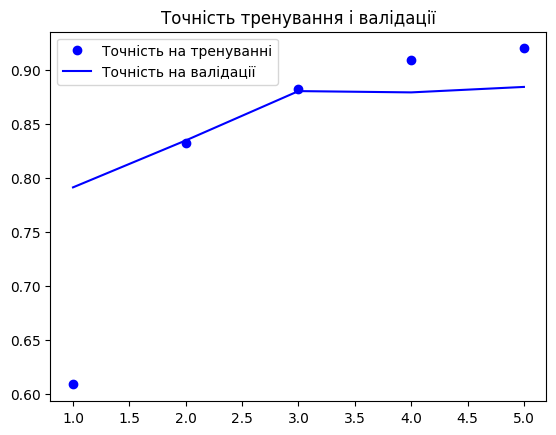

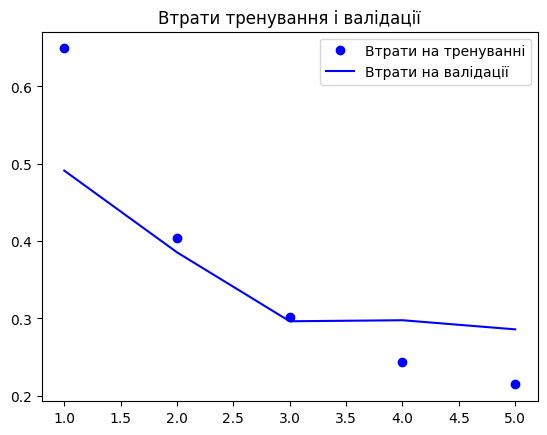

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [19]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 32s 40ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 31s 40ms/step - loss: 0.3040 - acc: 0.8777
Test Loss: 0.3040231764316559
Test Accuracy: 0.8776800036430359


# Deep RNN

![alt text](https://textbook.edu.goit.global/python/data-science-remaster/v1/img/module-11/example16.png)

**Deep RNN (Deep Recurrent Neural Network)** - це варіант рекурентної нейронної мережі (RNN), який має більше одного рекурентного шару. У Deep RNN кожен рекурентний шар передає свій вихід як вхід до наступного рекурентного шару.

Основна ідея Deep RNN полягає в тому, щоб дозволити моделі вивчати більш складні та абстрактні залежності в послідовних даних за допомогою більш глибокої архітектури. Кожен додатковий рекурентний шар дозволяє моделі узагальнювати більш складні функції, що може бути корисно для завдань, де важлива висока рівень абстракції.

В загальному випадку значення прихованого шару $h^[l]_t$ на часовому кроці $t$ і в рівні $l$ вираховується за формулою:

$$h_{t}^{(l)} = f(W^{(l)} \cdot x_{t} + U^{(l)} \cdot h_{t-1}^{(l)} + V^{(l)} \cdot h_{t}^{(l-1)} + b^{(l)})$$

Вихід $y_t$ на кожному часовому кроці генерується шляхом проходження прихованого стану кінцевого шару через інший лінійний перетворення:

$$y_t = g(W^{o}\cdot h_t^{L} +b^{o})$$
$W^{o}, b^{o}$- це вага та зміщення для вихідного шару

$g$- це функція активації для вихідного шару

$L$- загальна кількість шарів


## Висновки

Використання Deep RNN має свої власні виклики. Навчання їх може бути важким через проблему "зникаючого градієнта", коли градієнти, які передаються назад через мережу під час навчання, стають дуже малими і змушують ваги мережі оновлюватися дуже повільно. Деякі варіанти Deep RNN, такі як LSTM або GRU, були розроблені для вирішення цієї проблеми.

Також, оскільки Deep RNN має більше параметрів, вони можуть займати більше часу для тренування і бути схильними до перенавчання, особливо при використанні невеликих наборів даних.

## Практика

In [20]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

In [21]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [22]:
model = Sequential()
model.add(Embedding(max_features, 32)) # Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
                                        # Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_1 (Bidirecti  (None, None, 64)          16640     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 361537 (1.38 MB)
Trainable params: 361537 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
history = model.fit(input_train,
                    y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 110s 766ms/step - loss: 0.6366 - acc: 0.6020 - val_loss: 0.4427 - val_acc: 0.8107
Epoch 2/5
137/137 [==============================] - 112s 815ms/step - loss: 0.3745 - acc: 0.8428 - val_loss: 0.3101 - val_acc: 0.8760
Epoch 3/5
137/137 [==============================] - 103s 755ms/step - loss: 0.2742 - acc: 0.8941 - val_loss: 0.3582 - val_acc: 0.8415
Epoch 4/5
137/137 [==============================] - 112s 816ms/step - loss: 0.2230 - acc: 0.9153 - val_loss: 0.3634 - val_acc: 0.8528
Epoch 5/5
137/137 [==============================] - 111s 811ms/step - loss: 0.1863 - acc: 0.9329 - val_loss: 0.3110 - val_acc: 0.8751


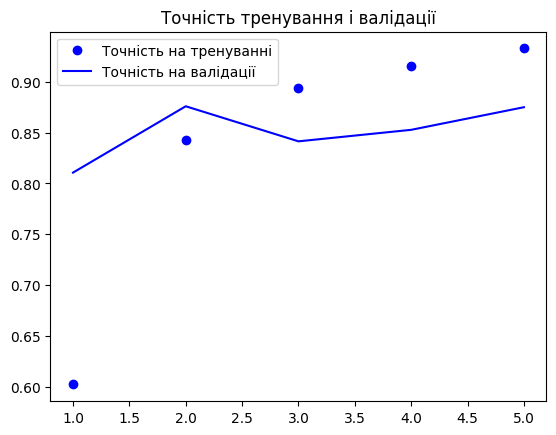

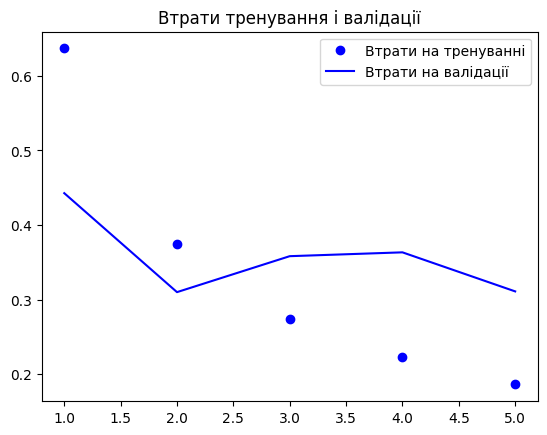

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [25]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 67s 85ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 66s 85ms/step - loss: 0.3180 - acc: 0.8738
Test Loss: 0.3179740905761719
Test Accuracy: 0.8737999796867371


# Практика

1. NY Stock Price Prediction RNN LSTM GRU

https://www.kaggle.com/code/raoulma/ny-stock-price-prediction-rnn-lstm-gru

2. Covid-19 Forecasting with an RNN

https://www.kaggle.com/code/frlemarchand/covid-19-forecasting-with-an-rnn

3. Fake News Detection Using RNN

https://www.kaggle.com/code/therealcyberlord/fake-news-detection-using-rnn

3. Poetry Generator

https://www.kaggle.com/code/paultimothymooney/poetry-generator-rnn-markov